In [25]:
import pandas as pd

In [28]:
loan_data = pd.read_csv("loan_data.csv")

In [30]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [32]:
# Check column types
print(loan_data.dtypes)

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object


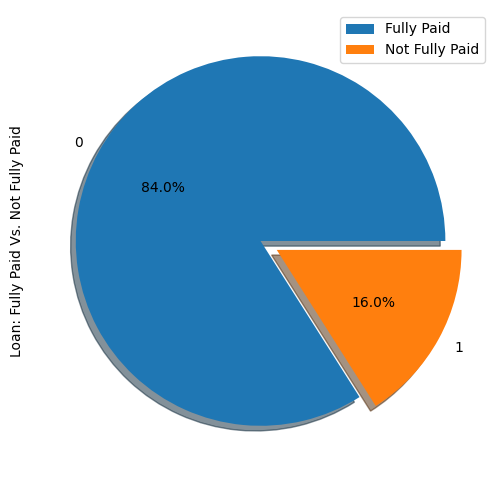

In [34]:
import matplotlib.pyplot as plt
# Helper function for data distribution
# Visualize the proportion of borrowers
def show_loan_distrib(data):
  count = ""
  if isinstance(data, pd.DataFrame):
      count = data["not.fully.paid"].value_counts()
  else:
      count = data.value_counts()


  count.plot(kind = 'pie', explode = [0, 0.1], 

              figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
  plt.ylabel("Loan: Fully Paid Vs. Not Fully Paid")
  plt.legend(["Fully Paid", "Not Fully Paid"])
  plt.show()


# Visualize the proportion of borrowers
show_loan_distrib(loan_data)

In [36]:
###From the pie chart above, we notice that 84% of the borrowers paid their loans back, and only 16% didn’t pay them back, which makes the dataset really imbalanced.

In [38]:
#the purpose attribute, which needs to be encoded. 
loan_data.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [40]:
encoded_loan_data = pd.get_dummies(loan_data, prefix="purpose",   

                                   drop_first=True)
print(encoded_loan_data.dtypes)

credit.policy                   int64
int.rate                      float64
installment                   float64
log.annual.inc                float64
dti                           float64
fico                            int64
days.with.cr.line             float64
revol.bal                       int64
revol.util                    float64
inq.last.6mths                  int64
delinq.2yrs                     int64
pub.rec                         int64
not.fully.paid                  int64
purpose_credit_card              bool
purpose_debt_consolidation       bool
purpose_educational              bool
purpose_home_improvement         bool
purpose_major_purchase           bool
purpose_small_business           bool
dtype: object


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [44]:
X = encoded_loan_data.drop('not.fully.paid', axis = 1)
y = encoded_loan_data['not.fully.paid']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify = y, random_state=2022)

In [46]:
encoded_loan_data['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

### SAMPLING TECHNIQUES 
##### We will undersample the majority class, which corresponds to the "fully paid" (class 0)

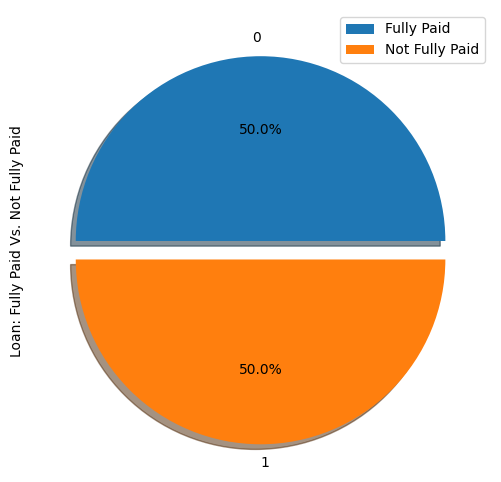

In [48]:
X_train_cp = X_train.copy()
X_train_cp['not.fully.paid'] = y_train
y_0 = X_train_cp[X_train_cp['not.fully.paid'] == 0]
y_1 = X_train_cp[X_train_cp['not.fully.paid'] == 1]
y_0_undersample = y_0.sample(y_1.shape[0])
loan_data_undersample = pd.concat([y_0_undersample, y_1], axis = 0)


# Visualize the proportion of borrowers
show_loan_distrib(loan_data_undersample)

### SMOTE Oversampling
##### Now we'll perform oversampling on the minority class

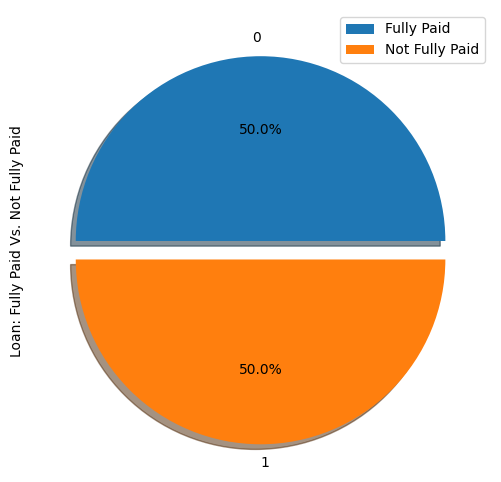

In [50]:
smote = SMOTE(sampling_strategy='minority')
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train,y_train)

# Visualize the proportion of borrowers
show_loan_distrib(y_train_SMOTE)

### Logistic Regression 
##### Now we'll apply logistic regression and It classifies a data point by modeling its probability of belonging to a given class using the sigmoid function. 

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [54]:
X = loan_data_undersample.drop('not.fully.paid', axis = 1)
y = loan_data_undersample['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify = y, random_state=2022)
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)

#Prediction 
y_pred = logistic_classifier.predict(X_test)

#Evaluation Metrics
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[100  61]
 [ 76  85]]
              precision    recall  f1-score   support

           0       0.57      0.62      0.59       161
           1       0.58      0.53      0.55       161

    accuracy                           0.57       322
   macro avg       0.58      0.57      0.57       322
weighted avg       0.58      0.57      0.57       322



C:\Users\ADMIN\PythonResourceEnv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Support Vector Machines 
##### SVM learns to draw the hyperplane (decision boundary) by using the margin to maximization principle. This decision boundary is drawn through the two closest support vectors. 
##### SVM provides a transformation strategy called kernel tricks used to project non-learner separable data onto a higher dimension space to make them linearly separable. 

In [56]:
from sklearn.svm import SVC

In [59]:
svc_classifier = SVC(kernel='linear')
svc_classifier.fit(X_train, y_train)


# SVM Prediction
y_pred = svc_classifier.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.39      0.46       161
           1       0.54      0.72      0.62       161

    accuracy                           0.55       322
   macro avg       0.56      0.55      0.54       322
weighted avg       0.56      0.55      0.54       322

